## Intro

## Overview of tech 

### Reinforcement Learning 

### OpenAI Gym

###



## 1. Setup Mario

In [1]:
## Install dependencies 
!pip install gym_super_mario_bros==7.3.0  nes_py 

### Import packages 

**Notes:**  
When working with machine learning models, it is best to try to simplify the environment as much as possible. 
Here we are simplifing the actions that our mario character can take. 

In [1]:
## Import game
import gym_super_mario_bros

## Import joybad wrapper 
from nes_py.wrappers import JoypadSpace

## Import the simplified controls 
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT


### Setup Game Env 

**Notes:**
Setting up the env with the specific super mario version 

Without setting up the joypad space as simple there are 256 discrete button combinations in the game. 
This complexity would take the model a long time to train and therefore we have simplified the environment to 7 actions. 

```
env.action_space
```

Observations space returns what you will be getting back from the game. 

```
env.observation_space.shape
```



In [2]:
## Setup the game environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')

## add the joypad to the env 
env = JoypadSpace(env, SIMPLE_MOVEMENT)

### Setup the game 

In [2]:
## Create a restart flag 
done = True 

## loop through frames (step)
for step in range(100000):
    ## Initial game start 
    if done: 
        ## Start the game 
        env.reset()
    ## env.step allows us to pass an action to the game (sample is a random action)
    ## Returns outputs
    state, reward, done, info = env.step(env.action_space.sample())
    ## Shows the game 
    env.render()
## Closes the game 
env.close()

NameError: name 'env' is not defined

In [4]:
## Closes the game 
env.close()

In [5]:
state = env.reset()
state, reward, done, info = env.step()

OSError: exception: access violation reading 0x000000000003C208

## 2. Preprocessing Environment 

In [ ]:
# Install pytorch
!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html --user

^C


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\david\AppData\Roaming\Python\Python38\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\david\AppData\Roaming\Python\Python38\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\david\AppData\Roaming\Python\Python38\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "c:\python38\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "c:\python38\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "c:\python38\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "c:\python38\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "c:\python38\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
socket.timeout

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


In [11]:
# !pip3 install torch torchvision torchaudio --user

  Using cached torchvision-0.11.2-cp38-cp38-win_amd64.whl (985 kB)
  Using cached torchaudio-0.10.1-cp38-cp38-win_amd64.whl (341 kB)


In [1]:
# Install stable baselines for RL stuff
!pip install stable-baselines3[extra] --user

In [3]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import FrameStack, GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [4]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [5]:
state = env.reset()

In [6]:
state, reward, done, info = env.step([5])

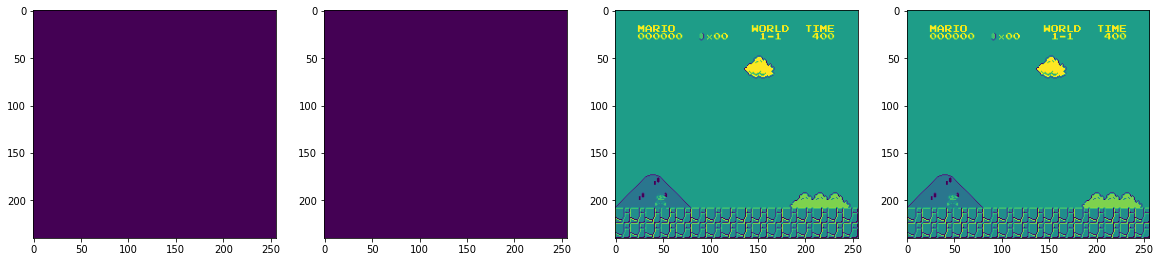

In [7]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

## 3. Train RL Model 


In [9]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [10]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [11]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [14]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [15]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [17]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=5000000, callback=callback)

Logging to ./logs/PPO_7


C:\Users\david\AppData\Roaming\Python\Python38\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 43  |
|    iterations      | 1   |
|    time_elapsed    | 11  |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 26           |
|    iterations           | 2            |
|    time_elapsed         | 38           |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 8.830568e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | -0.00188     |
|    learning_rate        | 1e-06        |
|    loss                 | 216          |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.000179    |
|    value_loss           | 546          |
------------------------------------------
-----------------------

In [33]:
model.save('thisisatestmodel')

## 4. Test the Model

In [12]:
# Load model
model = PPO.load('./train/best_model_5000000')

In [13]:
state = env.reset()

In [14]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

C:\Users\david\AppData\Roaming\Python\Python38\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
C:\Users\david\AppData\Roaming\Python\Python38\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [15]:
## Closes the game 
env.close()